In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np 
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_excel("data\energy.xlsx")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Rename all columns

In [4]:
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [5]:
df = df.drop(labels='orientation',axis=True)

In [6]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28


In [7]:
df.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [8]:
cols = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'glazing_area', 'glazing_area_distribution']
cols

['relative_compactness',
 'surface_area',
 'wall_area',
 'roof_area',
 'overall_height',
 'glazing_area',
 'glazing_area_distribution']

In [9]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28


In [10]:
## Independent and dependent feature
X = df.drop(labels=['heating_load','cooling_load'],axis=1)
y = df[['heating_load','cooling_load']]

In [11]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,cols)
])

In [12]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [13]:
y_train

,heating_load,cooling_load
429,14.34,14.96
524,13.68,15.19
212,33.08,34.11
558,14.50,17.12
66,36.90,34.43
...,...,...
98,24.13,26.13
322,12.73,15.48
382,14.60,15.14
365,12.29,15.40


In [14]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
## adjusted r2-score 
def adj_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (len(y_true) - 1)) / (len(y_true) - n_features - 1)
    return adj_r2


In [16]:
import numpy as np
def evaluate_model(true, predicted,n_features):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    adj_r2_square=adj_r2_score(true,predicted,n_features)
    return mae, rmse, r2_square,adj_r2_square

In [17]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Decesion_tree_regressor':DecisionTreeRegressor(),
    'Random_forest_regressor':RandomForestRegressor()
    
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square,adj_r2_square=evaluate_model(y_test,y_pred,X_train.shape[1])
   

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print(r2_list.append(r2_square))

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    print("Ajusted R2 score",adj_r2_square*100)
    
    print('='*35)
    print('\n')

LinearRegression
None
Model Training Performance
RMSE: 2.983821313049228
MAE: 2.1253339225725223
R2 score 90.05773278817631
Ajusted R2 score 89.74564368287244


Lasso
None
Model Training Performance
RMSE: 4.135650430253995
MAE: 2.928201330884981
R2 score 81.05640247473632
Ajusted R2 score 80.46176039995225


Ridge
None
Model Training Performance
RMSE: 3.007906454613377
MAE: 2.174660489946411
R2 score 89.89912523799462
Ajusted R2 score 89.5820574203532


Elasticnet
None
Model Training Performance
RMSE: 4.043995161744165
MAE: 2.894307446404346
R2 score 81.88107606263893
Ajusted R2 score 81.31232060272175


Decesion_tree_regressor
None
Model Training Performance
RMSE: 1.4314632289898255
MAE: 0.7406161616161616
R2 score 97.61737316231456
Ajusted R2 score 97.54258218534684


Random_forest_regressor
None
Model Training Performance
RMSE: 1.3406286662210967
MAE: 0.7135631368102792
R2 score 97.91016951639727
Ajusted R2 score 97.84456945637386




In [18]:
r2_list

[0.9005773278817631,
 0.8105640247473631,
 0.8989912523799463,
 0.8188107606263892,
 0.9761737316231456,
 0.9791016951639727]

In [19]:
model_list

['LinearRegression',
 'Lasso',
 'Ridge',
 'Elasticnet',
 'Decesion_tree_regressor',
 'Random_forest_regressor']

In [20]:
data = {'model_list':['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Decesion_tree_regressor', 'Random_forest_regressor'],
        'r2_list':[0.9005773278817631, 0.8105640247473631, 0.8989912523799463, 0.8188107606263892, 0.9761737316231456, 0.9786767313404301]}
df_pred = pd.DataFrame(data)
df_pred

,model_list,r2_list
0,LinearRegression,0.900577
1,Lasso,0.810564
2,Ridge,0.898991
3,Elasticnet,0.818811
4,Decesion_tree_regressor,0.976174
5,Random_forest_regressor,0.978677


In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='r2_list', ylabel='model_list'>

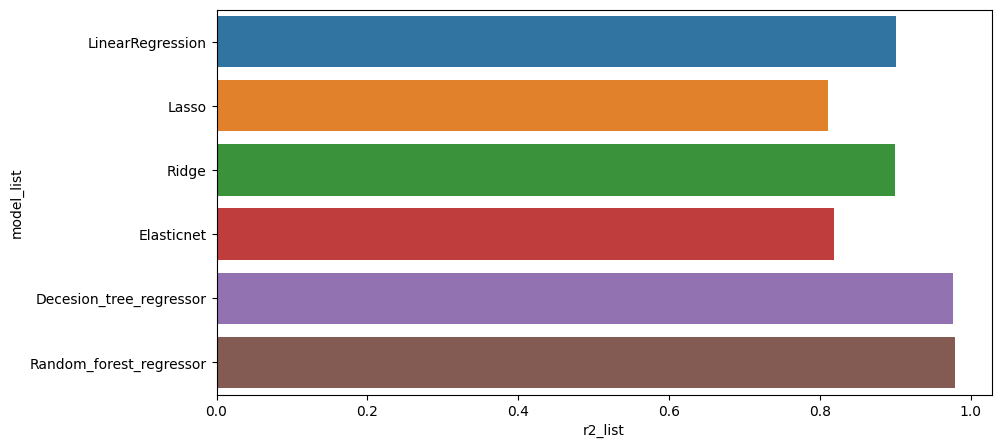

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_pred,y='model_list',x='r2_list')

Above barplot is showing realation between models and r2 score. 
It clearly shown that decesion_tree_regressor and random_forest_regressor have highest r2 score, so they are best model.